# 1 Understanding the Data

In [4]:
# load required libraries/modules
import pandas as pd

In [5]:
# Load the dataset
df=pd.read_csv("/content/covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
146592,146593,11/01/2020,New Brunswick,Canada,2021-04-02 15:13:53,344.0,6.0,303.0
146593,146594,11/01/2020,New Caledonia,France,2021-04-02 15:13:53,28.0,0.0,28.0
146594,146595,11/01/2020,New Hampshire,US,2021-04-02 15:13:53,11190.0,483.0,0.0
146595,146596,11/01/2020,New Jersey,US,2021-04-02 15:13:53,252263.0,16354.0,0.0


In [6]:
# Display basic information about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146597 entries, 0 to 146596
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              146597 non-null  int64  
 1   ObservationDate  146597 non-null  object 
 2   Province/State   104364 non-null  object 
 3   Country/Region   146597 non-null  object 
 4   Last Update      146597 non-null  object 
 5   Confirmed        146596 non-null  float64
 6   Deaths           146596 non-null  float64
 7   Recovered        146596 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


In [8]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,146597.000000,1.465960e+05,146596.000000,1.465960e+05
mean,73299.000000,2.543477e+04,907.859007,1.587994e+04
std,42319.053044,7.892193e+04,3142.281853,8.738220e+04
min,1.000000,0.000000e+00,-178.000000,-8.544050e+05
25%,36650.000000,3.280000e+02,4.000000,6.000000e+00
50%,73299.000000,3.002000e+03,59.000000,6.500000e+02
75%,109948.000000,1.403425e+04,435.000000,5.461000e+03
max,146597.000000,1.683775e+06,44024.000000,3.612478e+06


In [9]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# 2 Data Cleaning

In [10]:
# Handle missing values

In [11]:
df.isna().sum()

,0
SNo,0
ObservationDate,0
Province/State,42233
Country/Region,0
Last Update,0
Confirmed,1
Deaths,1
Recovered,1


In [12]:
cat=[]
con=[]

for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [13]:
cat

['ObservationDate', 'Province/State', 'Country/Region', 'Last Update']

In [14]:
con

['SNo', 'Confirmed', 'Deaths', 'Recovered']

In [15]:
for i in df.columns:
    if df[i].dtypes=='object':
        m=df[i].mode()[0]
        df[i]=df[i].fillna(m)
    else:
        me=df[i].mean()
        df[i]=df[i].fillna(me)

In [16]:
df.isna().sum()

,0
SNo,0
ObservationDate,0
Province/State,0
Country/Region,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


In [17]:
# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime

In [18]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['ObservationDate'].dtype

dtype('<M8[ns]')

In [19]:
# Check for duplicates

In [20]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


# 3 Descriptive Statistics

In [21]:
# Descriptive statistics

In [22]:
df.describe()

,SNo,ObservationDate,Confirmed,Deaths,Recovered
count,146597.000000,146597,1.465970e+05,146597.000000,1.465970e+05
mean,73299.000000,2020-07-20 03:25:18.440349696,2.543477e+04,907.859007,1.587994e+04
min,1.000000,2020-01-22 00:00:00,0.000000e+00,-178.000000,-8.544050e+05
25%,36650.000000,2020-06-06 00:00:00,3.280000e+02,4.000000,6.000000e+00
50%,73299.000000,2020-07-26 00:00:00,3.002000e+03,59.000000,6.500000e+02
75%,109948.000000,2020-09-13 00:00:00,1.403500e+04,435.000000,5.461000e+03
max,146597.000000,2020-11-01 00:00:00,1.683775e+06,44024.000000,3.612478e+06
std,42319.053044,NaN,7.892166e+04,3142.271135,8.738190e+04


In [23]:
# Summary statistics for categorical columns

In [24]:
df.describe(include=['object'])

,Province/State,Country/Region,Last Update
count,146597,146597,146597
unique,724,227,1848
top,Unknown,US,2021-04-02 15:13:53
freq,43858,14595,124422


# 4 Time Series Analysis

In [25]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered

In [26]:
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5.570000e+02,1.700000e+01,3.000000e+01
2020-01-23,1.097000e+03,3.400000e+01,6.000000e+01
2020-01-24,9.410000e+02,2.600000e+01,3.900000e+01
2020-01-25,1.437000e+03,4.200000e+01,4.200000e+01
2020-01-26,2.118000e+03,5.600000e+01,5.600000e+01
...,...,...,...
2020-10-28,4.457785e+07,1.175257e+06,3.007674e+07
2020-10-29,4.511631e+07,1.182310e+06,3.032349e+07
2020-10-30,4.568276e+07,1.190175e+06,2.971570e+07


In [27]:
# Plot time series data using line plot

<Axes: xlabel='ObservationDate', ylabel='Confirmed'>

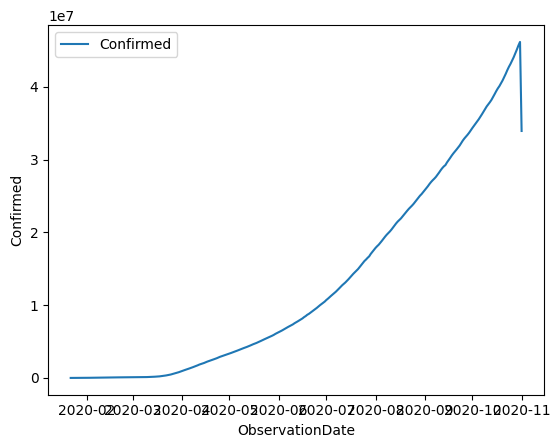

In [28]:
import seaborn as sns
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')

<Axes: xlabel='ObservationDate', ylabel='Deaths'>

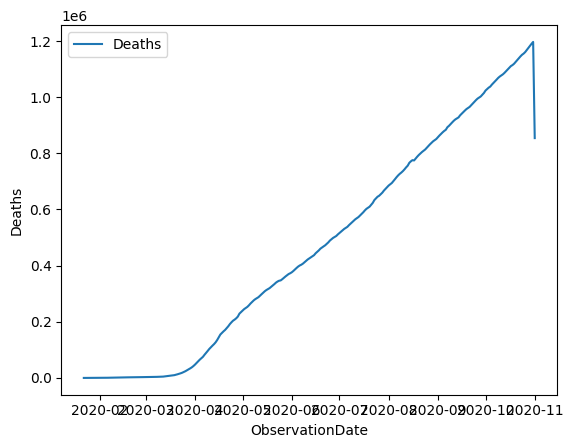

In [29]:
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')

# 5 Geographical Analysis

In [30]:
# Geographical analysis

In [31]:
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_country

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,5696723.0,187371.0,3766115.0
Albania,1341989.0,37797.0,767710.0
Algeria,5683093.0,233299.0,3906755.0
...,...,...,...
West Bank and Gaza,3263707.0,25137.0,2335928.0
Yemen,257682.0,72667.0,137706.0
Zambia,1356011.0,31291.0,1207970.0


In [32]:
# Plot geographical data

<Axes: xlabel='Country/Region', ylabel='Confirmed'>

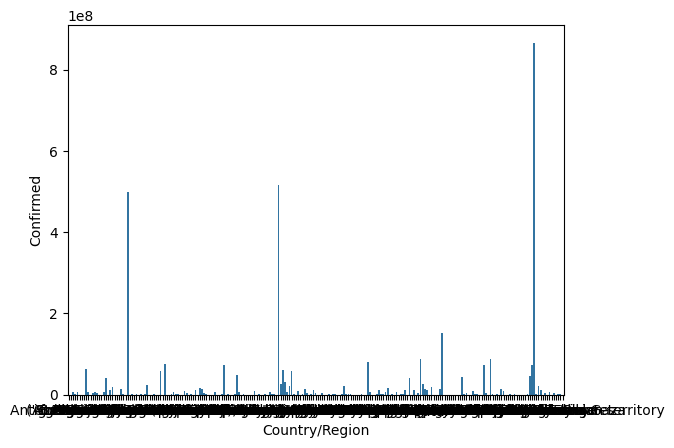

In [33]:
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)

# 6 Correlation Analysis

In [34]:
# Correlation analysis between confirmed,deaths and recovered

In [35]:
correlation_data = df[['Confirmed', 'Deaths', 'Recovered']]

correlation_matrix = correlation_data.corr()

print(correlation_matrix)


           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.770797   0.480989
Deaths      0.770797  1.000000   0.316427
Recovered   0.480989  0.316427   1.000000


In [36]:
# Plot correlation on heat map

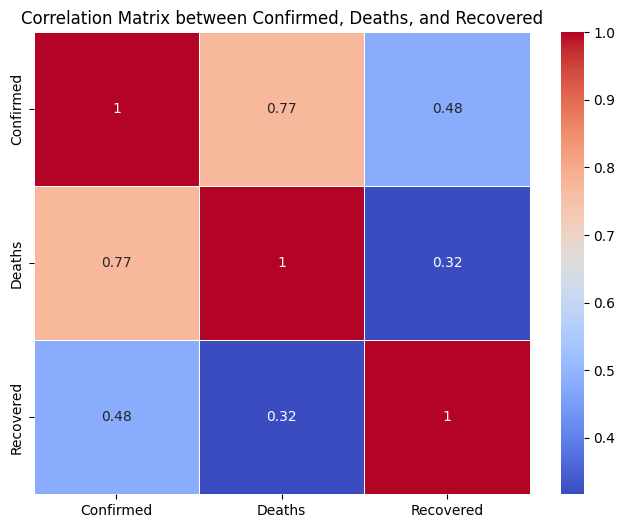

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between Confirmed, Deaths, and Recovered')
plt.show()


# 7 Advanced Analysis

In [38]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.

In [39]:
# Group by 'Country/Region' and calculate the sum of 'Confirmed', 'Deaths', and 'Recovered'
total_cases_by_country = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Display the result
print(total_cases_by_country)


                                Confirmed    Deaths  Recovered
Country/Region                                                
 Azerbaijan                           1.0       0.0        0.0
('St. Martin',)                       2.0       0.0        0.0
Afghanistan                     5696723.0  187371.0  3766115.0
Albania                         1341989.0   37797.0   767710.0
Algeria                         5683093.0  233299.0  3906755.0
...                                   ...       ...        ...
West Bank and Gaza              3263707.0   25137.0  2335928.0
Yemen                            257682.0   72667.0   137706.0
Zambia                          1356011.0   31291.0  1207970.0
Zimbabwe                         709332.0   19308.0   516523.0
occupied Palestinian territory       25.0       0.0        0.0

[227 rows x 3 columns]


In [40]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.

In [41]:
grouped_data = df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Find the top 10 countries/regions for each category
top_confirmed = grouped_data.nlargest(10, 'Confirmed')
top_deaths = grouped_data.nlargest(10, 'Deaths')
top_recoveries = grouped_data.nlargest(10, 'Recovered')

print("Top 10 countries/regions by confirmed cases:")
print(top_confirmed[['Country/Region', 'Confirmed']])

print("\nTop 10 countries/regions by deaths:")
print(top_deaths[['Country/Region', 'Deaths']])

print("\nTop 10 countries/regions by recoveries:")
print(top_recoveries[['Country/Region', 'Recovered']])


Top 10 countries/regions by confirmed cases:
    Country/Region     Confirmed
213             US  8.667028e+08
96           India  5.158977e+08
27          Brazil  4.981168e+08
171         Russia  1.530856e+08
193          Spain  8.875494e+07
161           Peru  8.675598e+07
137         Mexico  7.963834e+07
44        Colombia  7.443970e+07
71          France  7.431062e+07
190   South Africa  7.305337e+07

Top 10 countries/regions by deaths:
    Country/Region        Deaths
213             US  2.958680e+07
27          Brazil  1.644007e+07
96           India  8.876469e+06
137         Mexico  8.515001e+06
212             UK  8.136007e+06
102          Italy  7.179017e+06
71          France  6.129242e+06
193          Spain  6.024125e+06
161           Peru  3.479669e+06
98            Iran  3.375386e+06

Top 10 countries/regions by recoveries:
    Country/Region     Recovered
96           India  4.153156e+08
27          Brazil  4.029151e+08
213             US  2.938366e+08
171         Russia 

In [42]:
# Visualize the distribution of deaths using bar chart

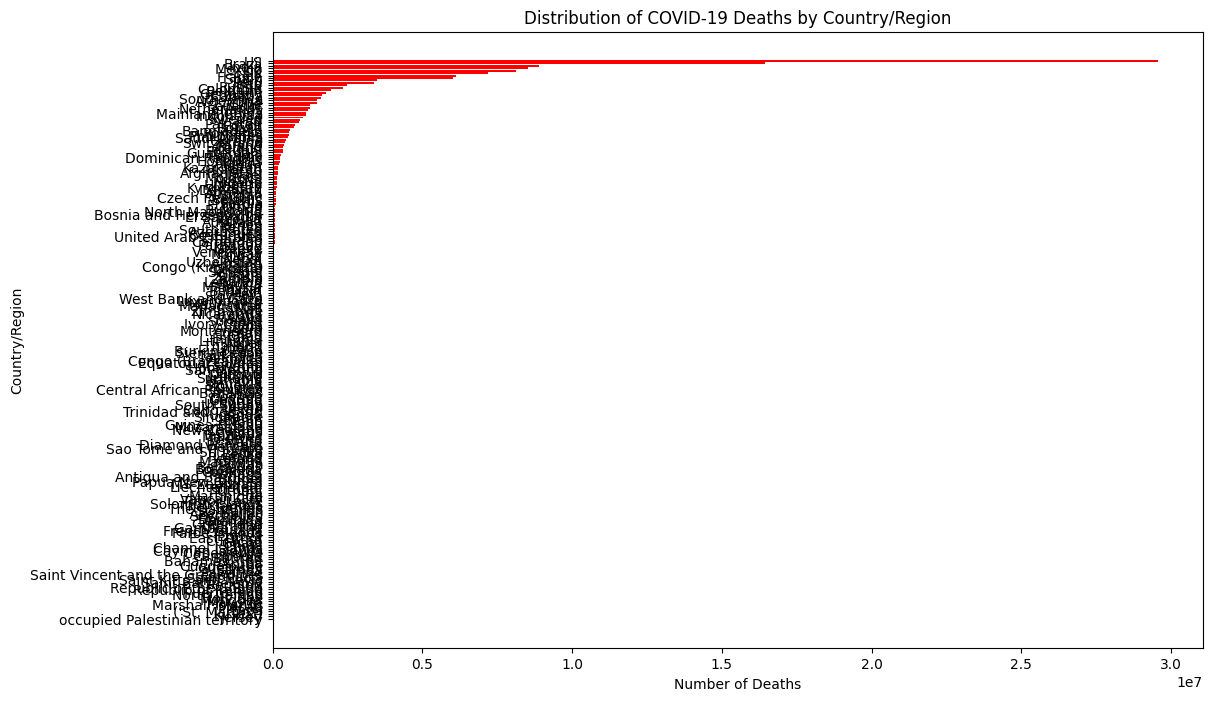

In [56]:


# Group by country/region and aggregate deaths
grouped_data = df.groupby('Country/Region').agg({
    'Deaths': 'sum'
}).reset_index()

# Sort by deaths
sorted_data = grouped_data.sort_values(by='Deaths', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_data['Country/Region'], sorted_data['Deaths'], color='red')
plt.xlabel('Number of Deaths')
plt.ylabel('Country/Region')
plt.title('Distribution of COVID-19 Deaths by Country/Region')
plt.gca().invert_yaxis()  # Highest values at the top
plt.show()



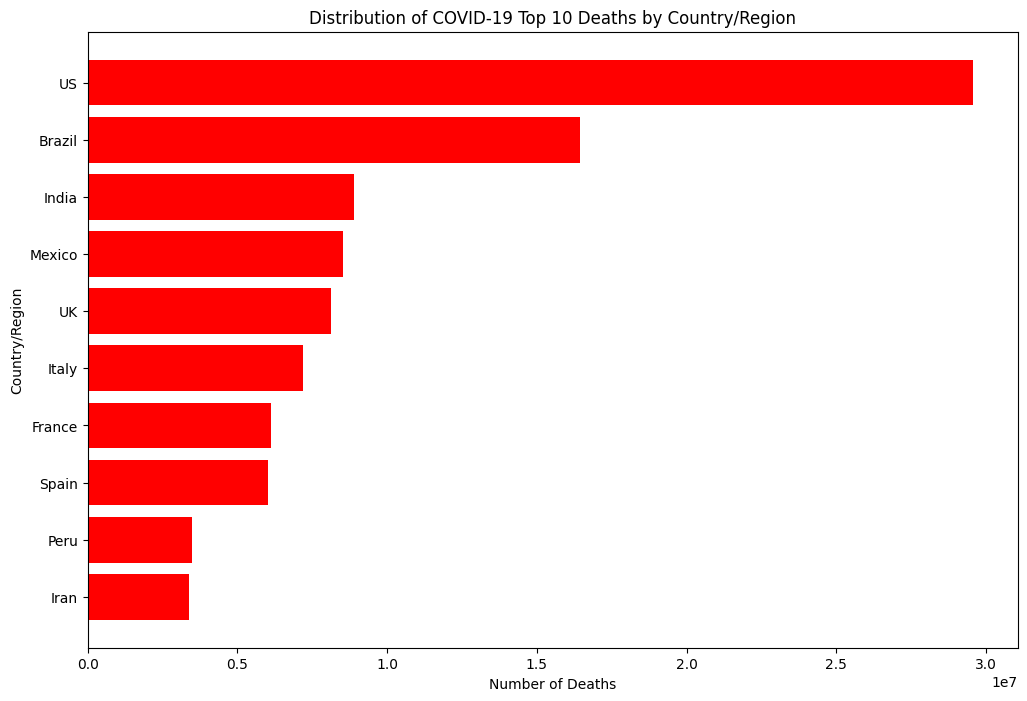

In [57]:
plt.figure(figsize=(12, 8))
plt.barh(top_deaths['Country/Region'], top_deaths['Deaths'], color='red')
plt.xlabel('Number of Deaths')
plt.ylabel('Country/Region')
plt.title('Distribution of COVID-19 Top 10 Deaths by Country/Region')
plt.gca().invert_yaxis()  # Highest values at the top
plt.show()